In [1]:
import pandas as pd
import numpy as np

### Import the data and have a glance of it

In [2]:
housing = pd.read_csv("housing.csv")

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### See some information and description of the data 

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### For data in formats other than numbers, like some falling on particular categories, have a look at the value count to know frequency of each category

In [6]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

### Have a histogram plot for every numeric data to have a look at the frequency of different intervals

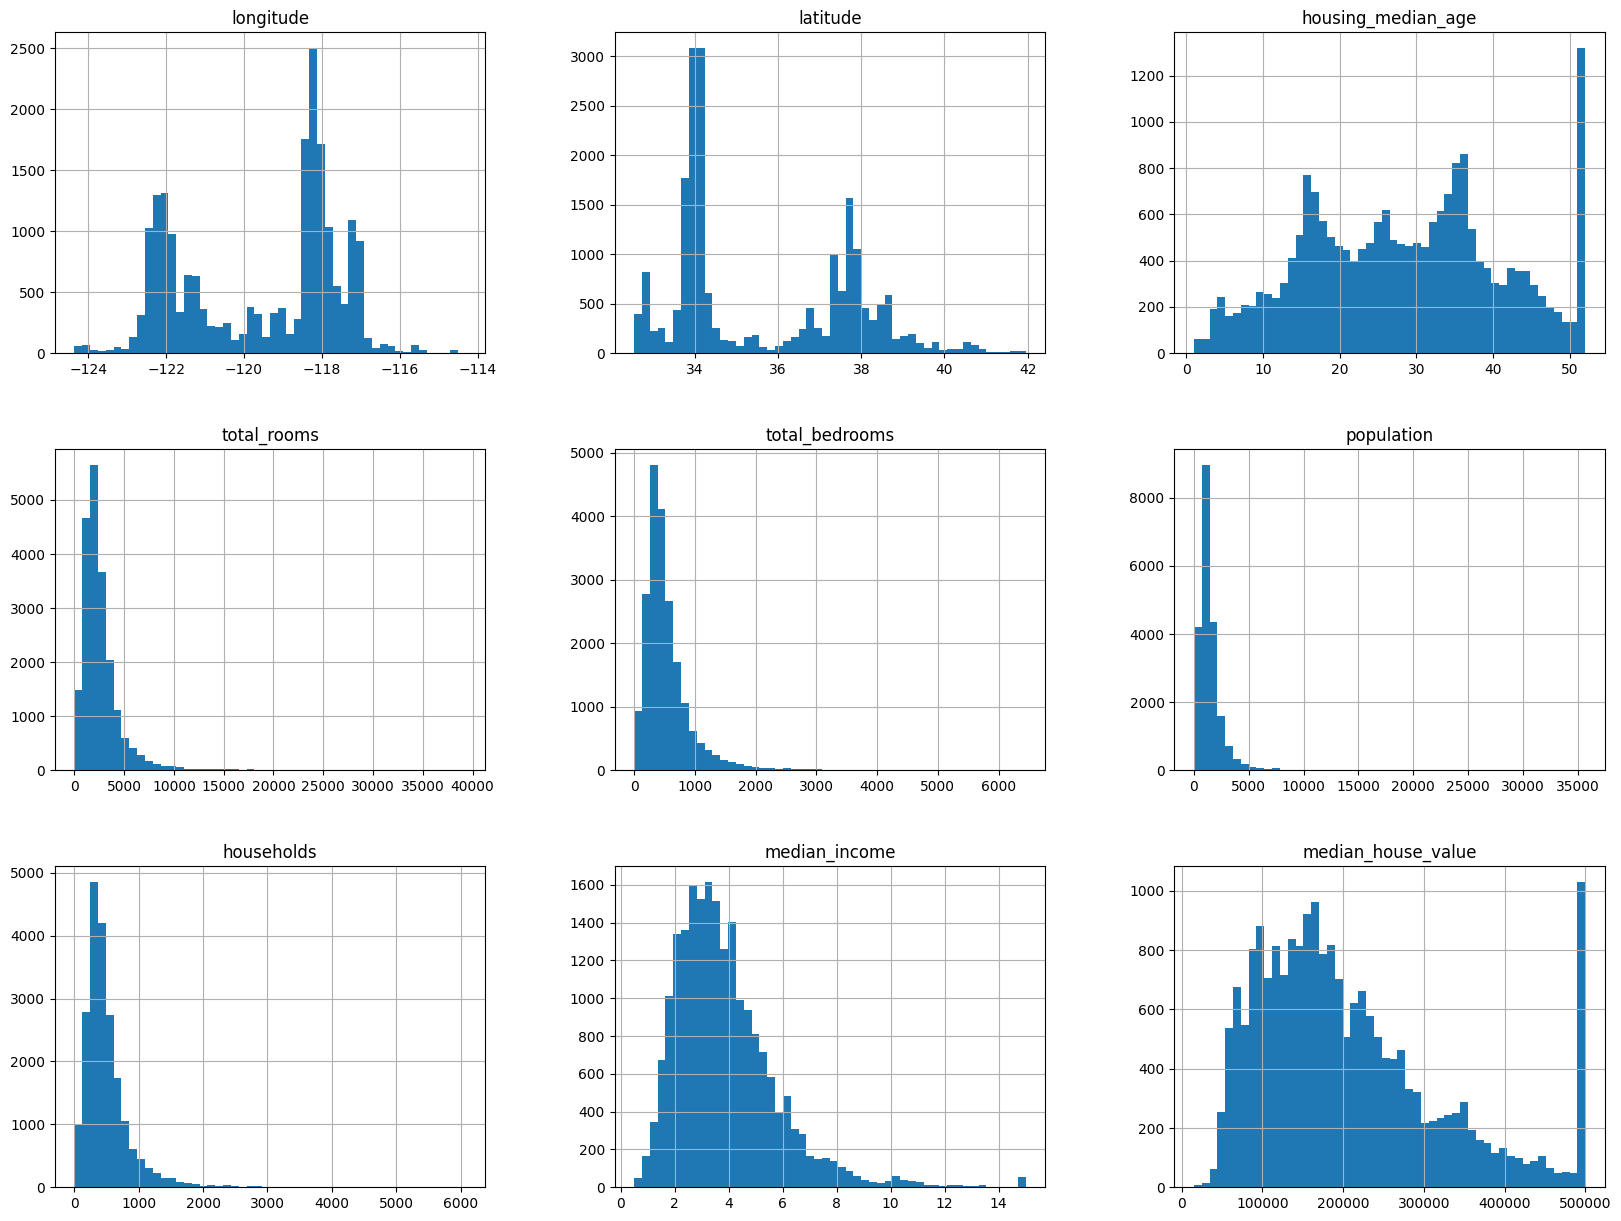

In [7]:
%matplotlib inline   
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

### Splitting the data into test set and training set

#### Option 1: You can split the data into 2 parts randomly
- Every time you will run the notebook the test set and the train set will change.
- You can use np.random.seed({SOME NUMBER}) to make sure everytime you run the notebook same indices are selected for test and train set
- Stratified sampling can not be satisfied with this option

In [8]:
def split_test_set(data, ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_indices = shuffled_indices[ : int(len(data) * ratio)]
    train_indices = shuffled_indices[int(len(data) * ratio) : ]
    test_set = data.iloc[test_indices]
    train_set = data.iloc[train_indices]
    return test_set, train_set
test_set, train_set = split_test_set(housing, 0.2)
print(f"Train set length: {len(train_set)}\nTest set length: {len(test_set)}")

Train set length: 16512
Test set length: 4128


#### Option 2: You can make use of the sklearn in built train_test_split function
- This is pretty similar to option 1
- If you specify the random state number then it will select same data in both the sets everytime you run the notebook
- Stratified sampling cannot be done

In [9]:
from sklearn.model_selection import train_test_split
training_set, testing_set = train_test_split(housing, test_size = 0.2, random_state = 42)
print(f"Train Set length: {len(training_set)}\nTest Set length: {len(testing_set)}")

Train Set length: 16512
Test Set length: 4128


#### Option 3: Stratified Sampling (The best option)
- Identify the most important attribute and classify the data in some parts based on that feature
- See the frequency of data in each classification (newly created classification)
- Split the data based on that classification
    - For example:
        - If a data has 4 classes:
            - Class 1: 15%
            - Class 2: 10%
            - Class 3: 70%
            - Class 4: 5%
    - Then the test set and the train set must also have the same percentage of each class 

<Axes: >

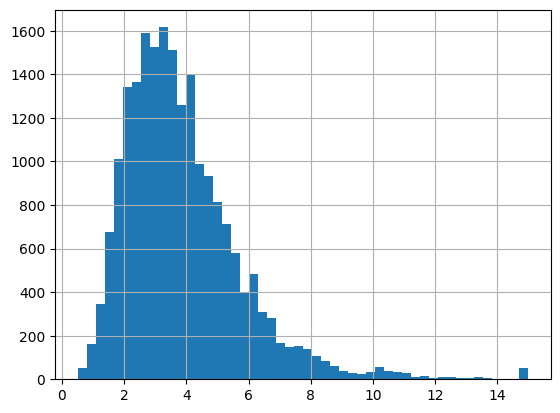

In [10]:
housing["median_income"].hist(bins=50)

In [11]:
housing["median_income"].max()

15.0001

#### Identify the intervals to break in and specify them in the bins section and give a name to each class in the labels section


In [12]:
housing["income_category"] = pd.cut(housing["median_income"], 
                                    bins = [0, 1.5, 3, 4.5, 6, np.inf], 
                                    labels = [1, 2, 3, 4, 5], 
                                    right = False)
housing[["median_income", "income_category"]].sample(10)

,median_income,income_category
19633,2.2679,2
19761,1.7708,2
6433,3.9400,3
18757,2.2120,2
17142,4.4688,3
4832,2.0405,2
17975,5.2534,4
10502,3.5915,3
15540,4.3513,3
10064,2.6341,2


#### Check the frequency of each newly formed class

In [13]:
housing["income_category"].value_counts()

income_category
3    7250
2    6550
4    3652
5    2373
1     815
Name: count, dtype: int64

#### Visualize the same with the help of a histogram

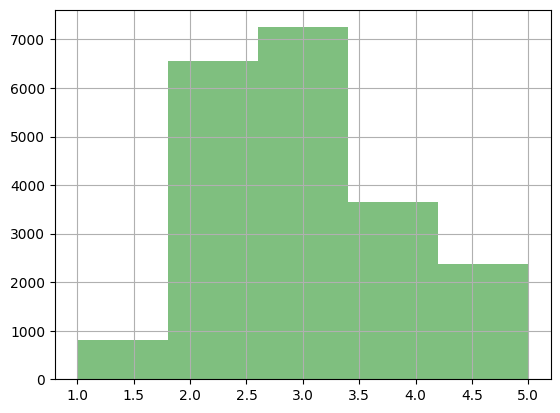

In [14]:
housing["income_category"].hist(color = 'g', alpha = 0.5, bins = 5)
plt.show()
full_dataset = housing["income_category"].value_counts() / len(housing)

#### With the help of StratifiedShuffleSplit class in Sklearn split the data into test set and train set 

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_category"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

#### Verify that each of the 3 data sets viz. full data set, train set and test set contains data in same proportion in accordance to the classes created by you

In [16]:
s_train_set = strat_train_set["income_category"].value_counts() / len(strat_train_set)

In [17]:
s_test_set = strat_test_set["income_category"].value_counts() / len(strat_test_set)

In [18]:
stratified_ratio_df = pd.DataFrame([full_dataset, s_train_set, s_test_set], 
                                   index = ["Full Set", "Train Set", "Test Set"],)
stratified_ratio_df

income_category,3,2,4,5,1
Full Set,0.35126,0.317345,0.176938,0.114971,0.039486
Train Set,0.35126,0.317345,0.176962,0.114947,0.039486
Test Set,0.35126,0.317345,0.176841,0.115068,0.039486


#### The class created by you was for our convinience so delete it once splitting into test set and train set is complete

In [19]:
for drop_set in (strat_train_set, strat_test_set):
    drop_set.drop("income_category", axis = 1, inplace = True)

### Now keep the test set aside and start working with the train set. Make a copy of the train set to make sure any changes you perform in the set won't affect your actual dataset.

### Explore the train set to derrive some base level conclusions

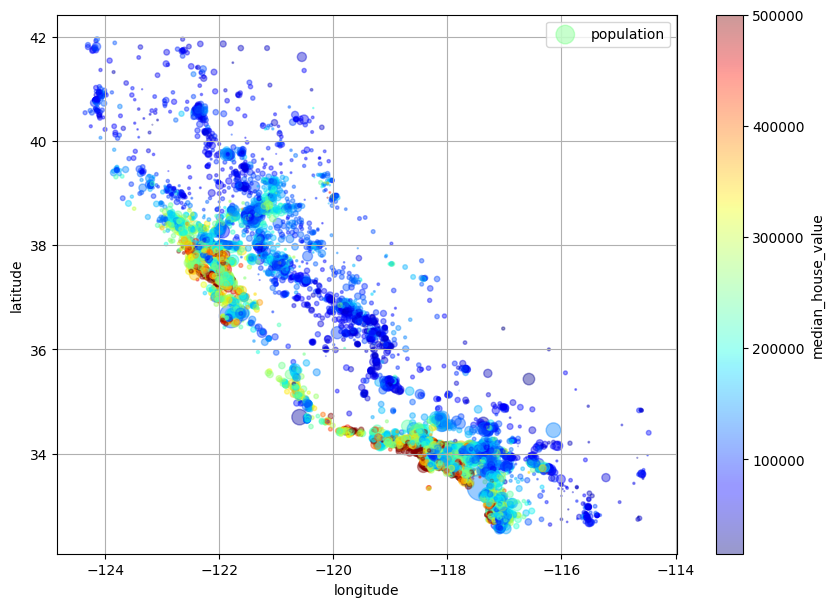

In [20]:
data = strat_train_set.copy()
data["population"]/=100
data.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4, 
             s = "population", label = "population", 
             c = "median_house_value", cmap=plt.get_cmap("jet"), figsize=(10,7), colorbar = True)
plt.legend()
plt.grid()
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

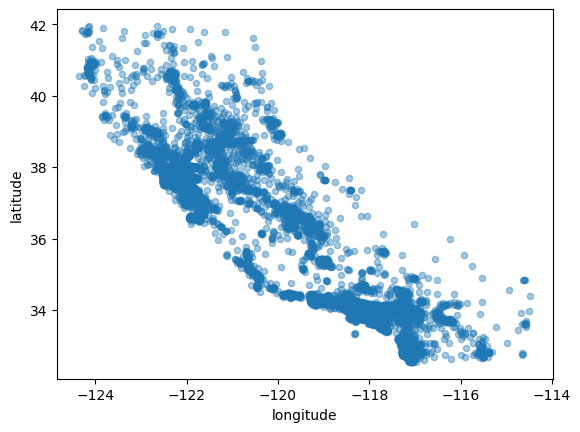

In [21]:
data.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4)

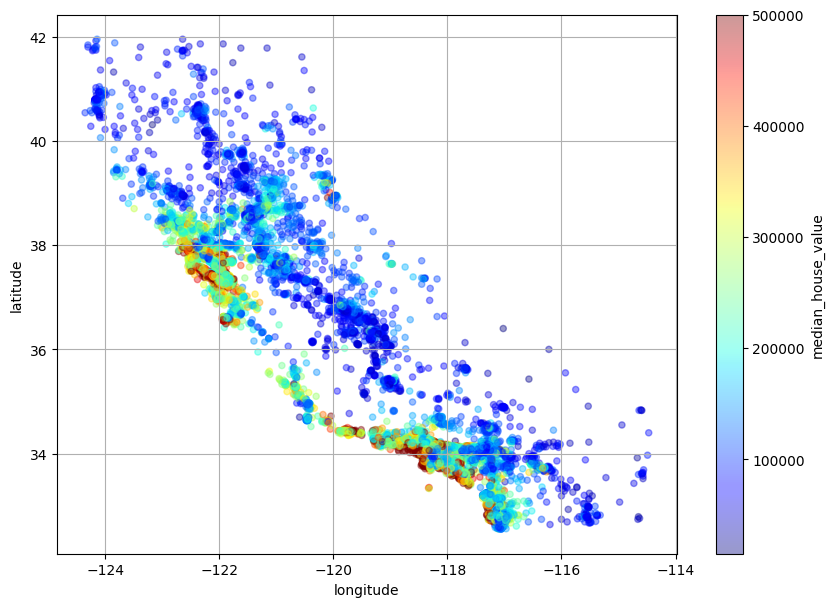

In [22]:
data.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4, 
             c = "median_house_value", cmap=plt.get_cmap("jet"), figsize=(10,7), colorbar = True)
plt.grid()
plt.show()

### For most of the ML algorithms, it is difficult to work with string data so for the time being remove the non-numeric data

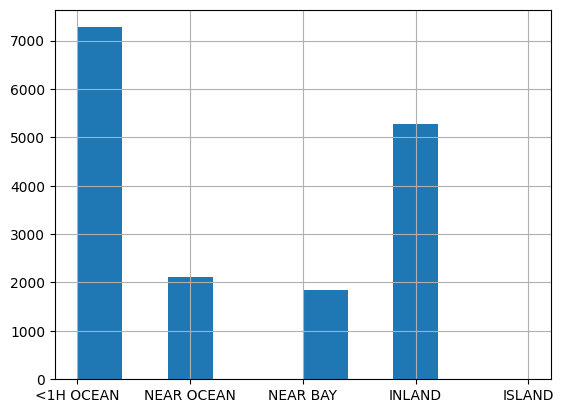

In [23]:
data["ocean_proximity"].hist()
plt.show()

In [24]:
data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     7274
INLAND        5275
NEAR OCEAN    2110
NEAR BAY      1850
ISLAND           3
Name: count, dtype: int64

In [25]:
data_without_ocean = data.drop(["ocean_proximity"], axis = 1)
data_without_ocean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
17262,-119.71,34.42,52.0,1411.0,324.0,10.91,306.0,4.1062,252900.0
16799,-122.44,37.67,35.0,1814.0,365.0,10.25,384.0,4.4250,268400.0
16718,-120.66,35.49,17.0,4422.0,945.0,23.07,885.0,2.8285,171300.0
5373,-118.38,34.04,36.0,3005.0,771.0,20.54,758.0,2.0437,309100.0
20311,-119.11,34.17,37.0,470.0,105.0,5.22,83.0,2.0368,243800.0
...,...,...,...,...,...,...,...,...,...
13893,-116.31,34.13,20.0,2352.0,556.0,12.17,481.0,1.6063,55400.0
20015,-119.08,36.09,25.0,1880.0,339.0,10.03,315.0,2.7298,103400.0
18879,-122.26,38.10,24.0,1213.0,395.0,6.99,386.0,1.3007,94600.0
19612,-121.11,37.47,12.0,2263.0,410.0,9.13,330.0,3.5795,145600.0


### Create the correlation matrix

In [26]:
corr_matrix = data_without_ocean.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924406,-0.110271,0.046208,0.070559,0.101778,0.058129,-0.017381,-0.045456
latitude,-0.924406,1.000000,0.013167,-0.036300,-0.067435,-0.108950,-0.072744,-0.076203,-0.144337
housing_median_age,-0.110271,0.013167,1.000000,-0.361847,-0.319500,-0.294295,-0.302308,-0.115598,0.108851
total_rooms,0.046208,-0.036300,-0.361847,1.000000,0.930540,0.852908,0.919858,0.194623,0.131329
total_bedrooms,0.070559,-0.067435,-0.319500,0.930540,1.000000,0.874161,0.981022,-0.012690,0.047040
population,0.101778,-0.108950,-0.294295,0.852908,0.874161,1.000000,0.902343,-0.001087,-0.030342
households,0.058129,-0.072744,-0.302308,0.919858,0.981022,0.902343,1.000000,0.008239,0.062166
median_income,-0.017381,-0.076203,-0.115598,0.194623,-0.012690,-0.001087,0.008239,1.000000,0.687446
median_house_value,-0.045456,-0.144337,0.108851,0.131329,0.047040,-0.030342,0.062166,0.687446,1.000000


### Study the correlation matrix for the target attribute and see which attribute has the most amount of correlation with the target attribute.

In [27]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687446
total_rooms           0.131329
housing_median_age    0.108851
households            0.062166
total_bedrooms        0.047040
population           -0.030342
longitude            -0.045456
latitude             -0.144337
Name: median_house_value, dtype: float64

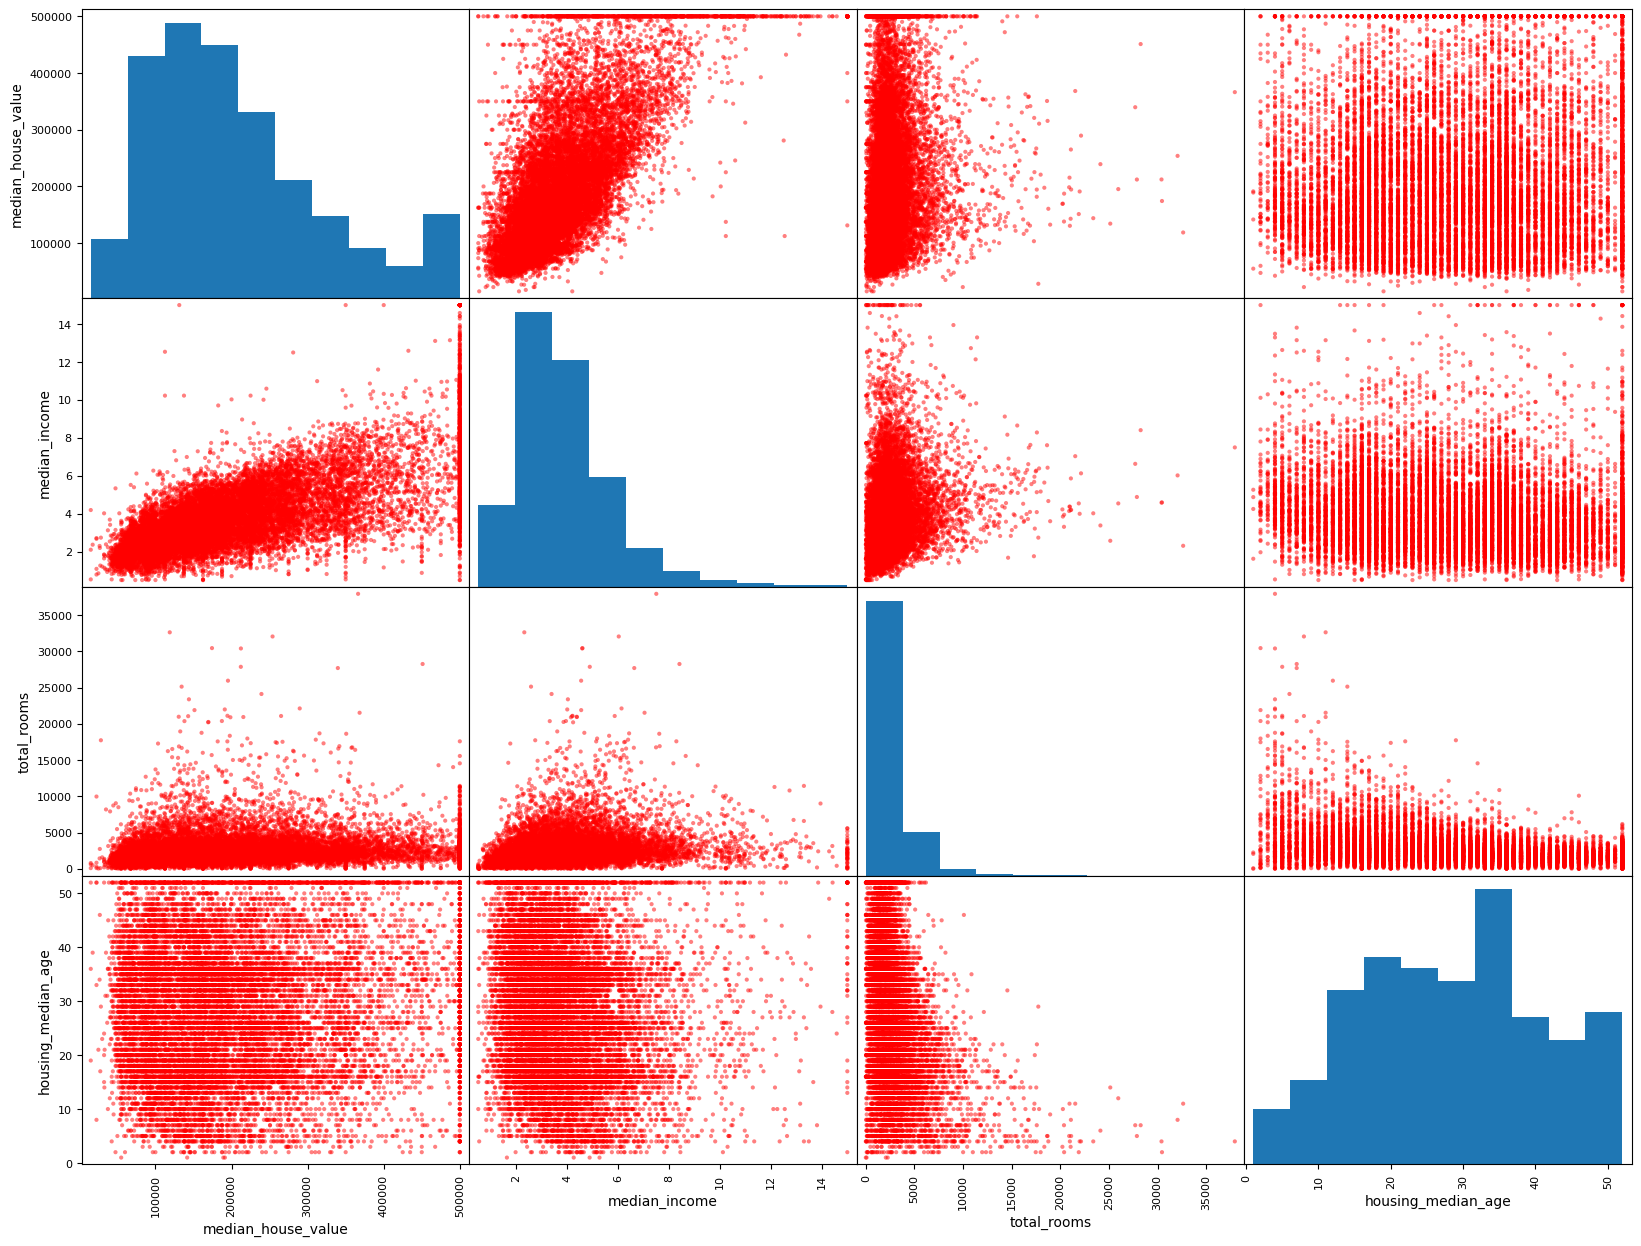

In [28]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(data[attributes], figsize=(20, 15), color = 'r')
plt.show()

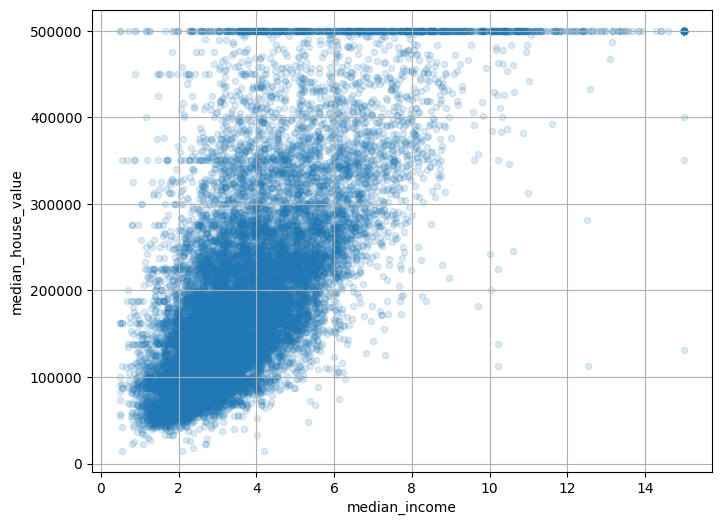

In [29]:
data.plot(kind = "scatter", x = "median_income", y = "median_house_value", figsize = (8, 6), alpha = 0.15)
plt.grid()
plt.show()

### Genetate some new features as per requirement which seems to be more promising than the already existing features

In [30]:
data["population_per_household"] = data["population"] / data["households"]
data["rooms_per_household"] = data["total_rooms"] / data["households"]
data["bedrooms_per_room"] = data["total_bedrooms"] / data["total_rooms"]

In [31]:
data_without_ocean = data.drop(["ocean_proximity"], axis = 1)

In [32]:
corr_matrix = data_without_ocean.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687446
rooms_per_household         0.156215
total_rooms                 0.131329
housing_median_age          0.108851
households                  0.062166
total_bedrooms              0.047040
population_per_household   -0.022300
population                 -0.030342
longitude                  -0.045456
latitude                   -0.144337
bedrooms_per_room          -0.250534
Name: median_house_value, dtype: float64

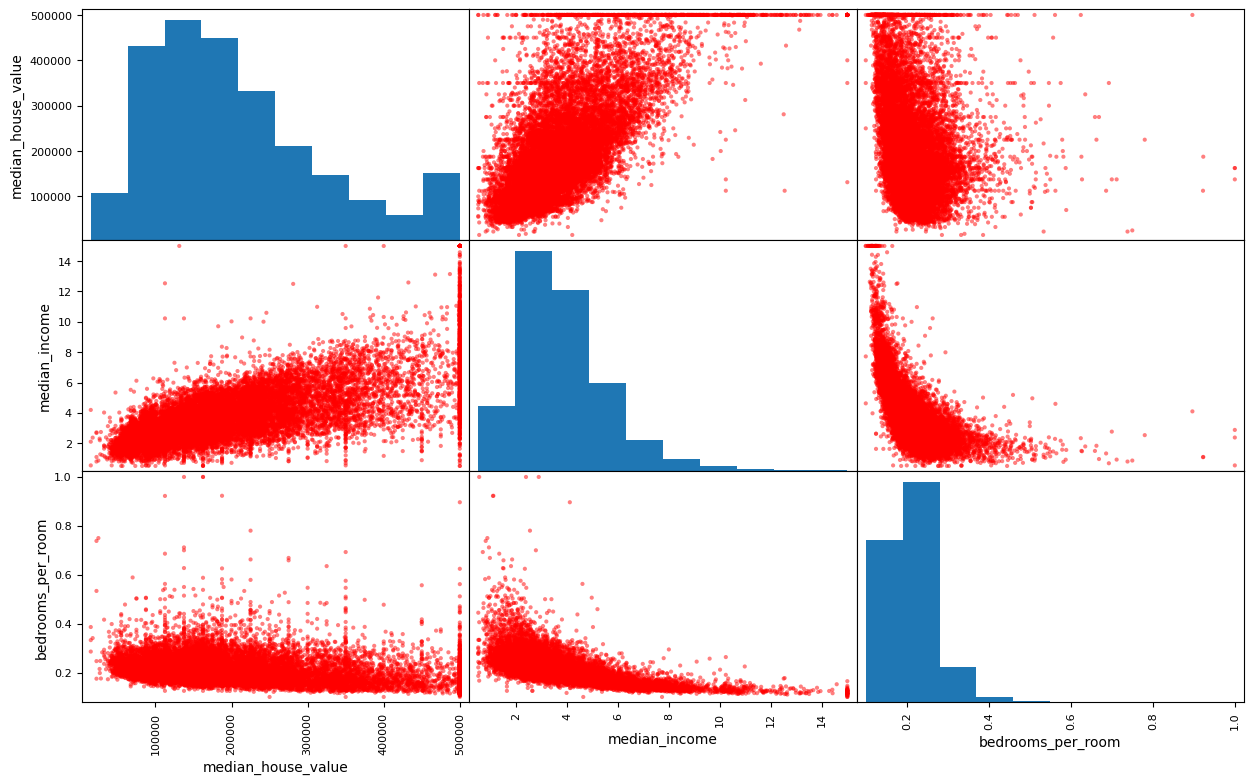

In [33]:
attributes = ["median_house_value", "median_income", "bedrooms_per_room"]
scatter = scatter_matrix(data[attributes], color = 'r', figsize = (15, 9))

In [43]:
strat_train_set.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
6679,-118.08,34.16,42.0,3490.0,665.0,1713.0,620.0,4.5461,242400.0,INLAND
6656,-118.13,34.15,18.0,1665.0,477.0,1095.0,390.0,2.6038,155600.0,<1H OCEAN
19167,-122.71,38.42,23.0,1569.0,414.0,1031.0,368.0,1.6267,129200.0,<1H OCEAN
5907,-118.44,34.29,35.0,2606.0,447.0,1555.0,404.0,4.6864,193800.0,<1H OCEAN
5796,-118.24,34.14,28.0,1843.0,554.0,1402.0,512.0,2.4620,254000.0,<1H OCEAN


In [44]:
train_data = strat_train_set.copy()
train_data.drop("median_house_value", inplace = True, axis = 1)
train_data_labels = strat_train_set["median_house_value"].copy()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 17262 to 4624
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16358 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


### Fill the null data and the empty data with median of the column or any other strategy like mean or mode using the SimpleImputer class of Sklearn

In [35]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
train_data_num = train_data.drop("ocean_proximity", axis = 1)
imputer.fit(train_data_num)
tr_temp = imputer.transform(train_data_num)
housing_tr = pd.DataFrame(tr_temp, columns=train_data_num.columns)

In [36]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


### Convert the non-numaric data into numeric categories

In [37]:
housing_ocean = train_data[["ocean_proximity"]] # the double square brackets returns a pandas DataFrame
                                                # a single bracket would have returned a pandas Series
                                                # but the fir_transform() method accepts DataFrame as its argument
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_ocean_encoded = ordinal_encoder.fit_transform(housing_ocean) # a one-D array is returned, pandas DataFrame is not returned
housing_ocean_encoded

array([[0.],
       [4.],
       [0.],
       ...,
       [3.],
       [1.],
       [0.]])

### Numeric categorires like 1,2,3... might not be the best for every case. Use the OneHotEncoder from Sklearn to create a binary like representation of the non numeric data. 

In [38]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder() # To create binary like representation for each category

In [39]:
housing_ocean_1hot = one_hot_encoder.fit_transform(housing_ocean) # returns a sparse matrix

In [40]:
one_hot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]